In [ ]:
## 이상치가 포함된 data를 먼저 만들어 보자. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#정규분포 평균 50, 펴준편차 10을 가지는 데이터 200개 생성 --> 데이터 프레임으로 변환

In [4]:
data = 10 * np.random.randn(200) + 50
df = pd.DataFrame({"값": data})

In [5]:
df

,값
0,44.913047
1,47.098626
2,57.189601
3,64.358347
4,66.853174
...,...
195,58.400817
196,53.265117
197,47.309782
198,41.285907


In [16]:
## 이상치 삾임 (임의로)     loc : index를 추가 하는 함수
df.loc[201] = 1
df.loc[202] = 100
df.loc[203]  = 10
df.loc[204] = 110

In [12]:
#분포 시각화

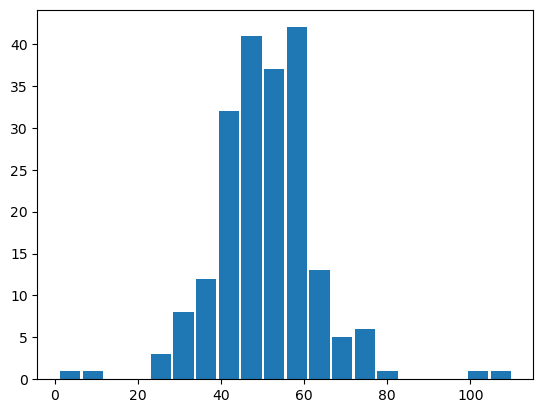

In [18]:
plt.hist(df["값"],bins=20, rwidth=0.9)
plt.show()

In [ ]:
## 여러가지 방법을 사용하여 판단하게 된다. 

In [ ]:
## 찾았으면  값을 삭제 하거나,  값을 대체 하거나 한다. 

In [ ]:
## IRQ 사용해 보기

{'whiskers': [<matplotlib.lines.Line2D at 0x13e8544a510>,
 'caps': [<matplotlib.lines.Line2D at 0x13e8544ab10>,
 'boxes': [<matplotlib.lines.Line2D at 0x13e85449fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x13e8544b110>],
 'fliers': [<matplotlib.lines.Line2D at 0x13e8544b2f0>],
 'means': []}

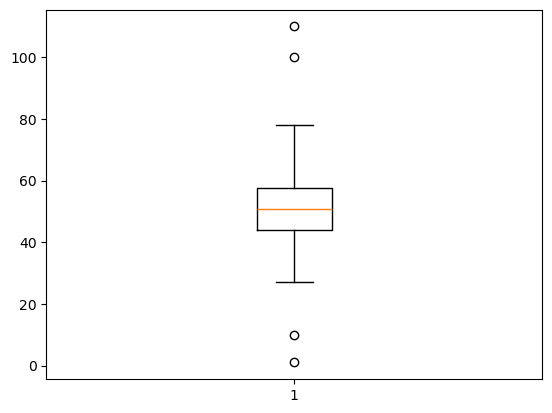

In [21]:
plt.boxplot(df["값"])

In [22]:
Q1= df["값"].quantile(.25)
Q2= df["값"].quantile(.5)
Q3= df["값"].quantile(.75)
#Q2= df["값"].quantile(.5)
IQR = Q3 - Q1

print("Q1 = ",Q1)
print("Q2 = ",Q2)
print("Q3 = ",Q3)
print("IQR = ",IQR)


Q1 =  43.84515466507189
Q2 =  50.87157189666091
Q3 =  57.64391059367148
IQR =  13.79875592859959


In [ ]:
#describe 함수 사용

In [25]:
Q1 = df["값"].describe()["25%"]
Q2 = df["값"].describe()["50%"]
Q3 = df["값"].describe()["75%"]
IQR = Q3 - Q1

print("Q1 = ",Q1)
print("Q2 = ",Q2)
print("Q3 = ",Q3)
print("IQR = ",IQR)


Q1 =  43.84515466507189
Q2 =  50.87157189666091
Q3 =  57.64391059367148
IQR =  13.79875592859959


In [ ]:
#둘다 동일한 경과이다.  표현법만 다르다. 

In [27]:
condition = df["값"] > (Q3 + IQR * 1.5)
upperOutlier = df[condition]
condition = df["값"] > (Q1 - IQR * 1.5)
lowerOutlier = df[condition]

print(lowerOutlier)
print(upperOutlier)

              값
0     44.913047
1     47.098626
2     57.189601
3     64.358347
4     66.853174
..          ...
197   47.309782
198   41.285907
199   72.101936
202  100.000000
204  110.000000

[202 rows x 1 columns]
         값
202  100.0
204  110.0
